# 11. Vector fields

This notebook is part of the [Introduction to manifolds in SageMath](https://sagemanifolds.obspm.fr/intro_to_manifolds.html) by Andrzej Chrzeszczyk (Jan Kochanowski University of Kielce, Poland).

In [1]:
version()

'SageMath version 9.6, Release Date: 2022-05-15'

A **vector field** $X$ on a manifold $M$  assigns to a point $p ∈ M$ a tangent vector
$X(p) ∈ T_p M$. Instead of $X(p)$ we shall write $X_p$. Since a vector field gives us a tangent vector at each point of its domain and
a tangent vector can be applied to real-valued smooth functions to yield real
numbers, given a vector field $X$ and $f ∈ C^∞ (M)$, we can form a real-valued function
$X(f)=Xf$, defined by 
\begin{equation}
(X f )( p) ≡ X_p( f ).
\label{}\tag{11.1}
\end{equation}


We have also an equivalent definition<br>
A **vector field**  $X$ on a manifold $M$ is a linear map $X : C^∞ (M ) → C^∞ (M )$ such that

$$X(f g) = f X(g) + gX(f )\quad \mbox{   for all } f, g ∈ C^∞ (M ).$$

A vector field $X$ is **smooth** if for all $f\in C^\infty(M)$ the function $Xf$ is also in $C^\infty(M)$.<br>
Equivalently we can say that a vector field $X$ on a manifold $M$ is **smooth** if for any coordinate chart $φ = (x^1 ,\ldots , x^n ) :U → R^n$ we have for any point $p ∈ U$ 
\begin{equation}
X(p) = f^i(p)\frac{\partial}{\partial x^i}\Big|_p
\label{}\tag{11.2}
\end{equation}
for some $C^\infty$ functions $f^i : U → R$.<br>


<br>

### Frames

<br>

To define vector fields with specified components in SageMath Manifolds we  need vector frames.


If $U$ is an open subset of a manifold $M$ (for example a coordinate neighborhood)  then the **vector frame** on $U$ is the sequence $e$ of vector fields on $U$ such that for each $p∈U, \ e(p)$ is a vector basis of the tangent space $T_pU$.<br><br>

Usually we shall use the coordinate frames associated with the local coordinates.

<br>

**Example 11.1**

Let us display the frame coresponding to the default chart

In [2]:
%display latex
R2=Manifold(2,'R^2',start_index=1)     # manifold R^2
c_xy.<x,y>=R2.chart()                  # global coordinates
v = R2.vector_field(name='v')          # vector field on R2
e = c_xy.frame()                       # vector frame
print(e)
e

Coordinate frame (R^2, (∂/∂x,∂/∂y))


Coordinate frame (R^2, (∂/∂x,∂/∂y))

In this case the elements of the frame are the vector fields $p\to \frac{\partial}{\partial x^i}\big|_p\quad$ 
($\frac{\partial}{\partial x^i}\big|_p$ was defined by formula (8.3)).<br><br>
If the frame is not defined by the user, the default frame is used.

Let us check how the elements e[1],e[2] of our frame e act on a scalar function.

In [3]:
# continuation                   # f is a scalar function on R2:
f = R2.scalar_field(function('f')(x,y), name='f') 
e[1](f).expr(), e[2](f).expr()   # values of the vector frame on f

(diff(f(x, y), x), diff(f(x, y), y))

If the frame is defined, we can define the components of the vector field in this frame.

<br>

**Example 11.2**

Here defining a vector field, we use frame e:

In [4]:
R2=Manifold(2,'R^2',start_index=1)     # manifold R2
c_xy.<x,y>=R2.chart()                  # global coordinates
v = R2.vector_field(name='v')          # vector field v
e = c_xy.frame()                       # vector frame e
v[e,:] = [-y, 1+x]                     # components of v in e
v.display()                            # show v

v = -y ∂/∂x + (x + 1) ∂/∂y

Since we use the default frame, the previous code can be simpified.

<br>

**Example 11.3**

Here the frame is not specified, the result is the same, since we have used the default frame

In [5]:
R2=Manifold(2,'R^2',start_index=1)     # manifold R2
c_xy.<x,y>=R2.chart()                  # global coordinates
v = R2.vector_field(name='v')          # vector field
v[:] = [-y, 1+x]               # components of v in default frame
v.display()                            # show v

v = -y ∂/∂x + (x + 1) ∂/∂y

The value of v on a scalar function:

In [6]:
# continuation                         # scalar function
f = R2.scalar_field(function('f')(x,y), name='f') 
s=v(f)                                 # value of v on f
s.expr()                               # show expression

-y*diff(f(x, y), x) + (x + 1)*diff(f(x, y), y)

<br>

**Example 11.4**

Let us check that vector fields are derivations.

In [7]:
# vector fields are derivations
R2=Manifold(2,'R^2',start_index=1)        # manifold R2
c_xy.<x,y>=R2.chart()                     # global coordinates
v = R2.vector_field(name='v')             # vector field v
e = c_xy.frame()                          # frame on R2
f=R2.scalar_field(function('f')(x,y))     # scalar function f
g=R2.scalar_field(function('g')(x,y))     # scalar function g
v1=R2.scalar_field(function('v1')(x,y))   # component v1 of v
v2=R2.scalar_field(function('v2')(x,y))   # component v2 of v
v[e,:] = [v1, v2]                         # components of v in frame e

First we compute the value of  $\ v(fg)$:

In [8]:
v(f*g).expr()                             # value of v on f*g

g(x, y)*v1(x, y)*diff(f(x, y), x) + g(x, y)*v2(x, y)*diff(f(x, y), y) + f(x, y)*v1(x, y)*diff(g(x, y), x) + f(x, y)*v2(x, y)*diff(g(x, y), y)

and next the value of $\ fv(g)+gv(f)$:

In [9]:
(f*v(g)+g*v(f)).expr()                    #  value of f*v(g)+g*v(f)

g(x, y)*v1(x, y)*diff(f(x, y), x) + g(x, y)*v2(x, y)*diff(f(x, y), y) + f(x, y)*v1(x, y)*diff(g(x, y), x) + f(x, y)*v2(x, y)*diff(g(x, y), y)

Both values are the same:

In [10]:
v(f*g) == f*v(g) + g*v(f)                 # check if v is derivation

True

<br>

**Example 11.5**

 Let us plot the vector field 
 $\quad v_0=\frac{-y}{\sqrt{x^2+y^2}}\frac{\partial}{\partial x}
 +\frac{x}{\sqrt{x^2+y^2}}\frac{\partial}{\partial y}.
 $
 
 To obtain the plot, some restriction are necessary.

In [11]:
%display latex
R2=Manifold(2,'R^2',start_index=1)        # manifold R2
c_xy.<x,y>=R2.chart(coord_restrictions=lambda x,y:x^2+y^2>0) 
v0=R2.vector_field(name='v0')             # vector field v0
v0[:]=-y/sqrt(x^2+y^2),x/sqrt(x^2+y^2)    # components of v0
v0.display()

v0 = -y/sqrt(x^2 + y^2) ∂/∂x + x/sqrt(x^2 + y^2) ∂/∂y

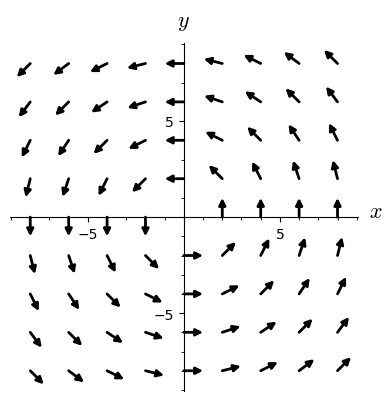

In [12]:
v0.plot(arrowsize=2,color='black',aspect_ratio=1)  # plot v0

Use the command `v0.plot?` to see   how to plot vector fields.

<br>

**Example 11.6**

Now let us plot the vector field
$\quad v_1=x\frac{\partial}{\partial x}
 -y\frac{\partial}{\partial y}.
 $
 
 Here we have excluded some neighborhood of the origin.

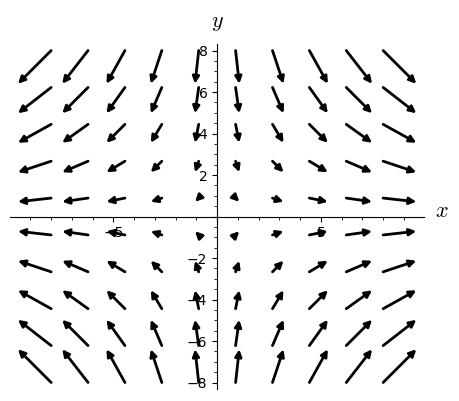

In [13]:
M=Manifold(2,'M')               # manifold M
X.<x,y>=M.chart(coord_restrictions=lambda x,y:(abs(x)>0.1,abs(y)>0.1))
e=X.frame()                     # frame e on M
v1=M.vector_field(name='v1')    # vector field v1
v1[e,:]=x,-y                    # components of v1
v1.plot(number_values=10, scale=0.2,
  arrowsize=2,color='black',aspect_ratio=1)  # plot v1

<br>

**Example 11.7**

Let us consider the two-dimensional sphere with spherical coordinates $\theta,\phi$ and the corresponding frame $\frac{\partial}{\partial\theta},\frac{\partial}{\partial\phi}$.

In [14]:
%display latex
S2=manifolds.Sphere(2)                    # sphere S^2
Phi=S2.embedding()                        # embedding S^2 -> E^3
sph.<th,ph>=S2.spherical_coordinates()    # spherical coord. on S^2
sphFr=sph.frame()                         # frame on S^2
E=S2.ambient()                            # Euclidean space E^3
cart.<x,y,z> = E.cartesian_coordinates()  # Cart.coord. in E^3

First let us plot the vector field $\frac{\partial}{\partial\phi}$:

In [15]:
p1=sphFr[2].plot(chart=cart, mapping=Phi,number_values=10,
    scale=0.5,arrowsize=0.5,label_axes=False,thickness=0.5,
    width=0.5,color='black')          # plot vector field d/dphi
s=sphere(color='lightgrey',opacity=0.9)   # plot the sphere
(p1+s).show(frame=False,label_axes=False) # combine plots

Graphics3d Object

and next $\frac{\partial}{\partial\theta}$:

In [16]:
p3=sphFr[1].plot(chart=cart, mapping=Phi,number_values=10,
    scale=0.3,arrowsize=0.5,label_axes=False,thickness=0.5,
    width=0.5,color='black')      # plot vector field d/dtheta
(s+p3).show(frame=False,label_axes=False)  # combine plots

Graphics3d Object

<br>

### Vector fields of tangents to a curve

<br>

We can also define a vector fields of tangents to a curve $\gamma$ in a manifold $M$ i.e. the map
$t\to \gamma'(t)\in T_{\gamma(t)}M$ defined for $t$ from some  interval $I$.

<br>

**Example 11.8**

Let us plot the vector field of tangent vectors to the curve
$\ \gamma\ $ defined in Cartesian coordinates by $(x(t),y(t),z(t))=(\cos(3t),\sin(3t),2t)$.

In [17]:
R.<t> = manifolds.RealLine()         # Real line with coordinate t
R3 = Manifold(3, 'R^3')              # manifold R3
X.<x,y,z> = R3.chart()               # cartesian coordinates in R3
                                     # curve c definition
c=R3.curve({X:[cos(3*t),sin(3*t),2*t]},(t, -pi/2, +pi/2),name='c')
                                     # plot curve:
p=c.plot(X,color='grey',thickness=3,plot_points=200,label_axes=False)
vc = c.tangent_vector_field()        # vector field vc along c
p2=vc.plot(chart=X, number_values=40, scale=0.15,
  arrowsize=0.5,thickness=0.5,width=0.5,
  color='black', label_axes=False)   # plot the vector field
(p+p2).rotateZ(pi/2).show(figsize=[4,3],aspect_ratio=[1,1,0.4],
  label_axes=False)                  # combine plots  

Graphics3d Object

<br>

**Example 11.9**

Now let us try to plot a curve on the sphere and the vector field of tangents to that curve. 

We start from preparation commands from Example 11.7.

In [18]:
S2=manifolds.Sphere(2)                    # sphere S^2
Phi=S2.embedding()                        # embedding S^2 -> E^3
sph.<th,ph>=S2.spherical_coordinates()    # spherical coord.on S^2
sphFr=sph.frame()                         # frame on S^2
E=S2.ambient()                            # Euclidean space E^3
cart.<x,y,z> = E.cartesian_coordinates()  # Cartesian coord.in E^3

Next we define the curve and the vector field of tangents.

In [19]:
R.<t> = manifolds.RealLine()              # real line
c = S2.curve({sph: [t, cos(2*t)]},        # curve th=t,ph=cos(2t)
    (t, -oo, +oo), name='c')
vc = c.tangent_vector_field()             # vecor field of tangents

Now we plot the curve:

In [20]:
p4=c.plot(chart=cart,mapping=Phi,thickness=2,color='black',
    plot_points=200, aspect_ratio=1,label_axes=False)  # plot curve

the vector field of tangents:

In [21]:
p5=vc.plot(chart=cart,mapping=Phi, number_values=40, scale=0.2,
  arrowsize=0.3,thickness=0.3,width=0.3,color='black',
  label_axes=False)                      # plot vector field

and the sphere:

In [22]:
s=sphere(color='lightgrey',opacity=0.6)  # plot sphere

Finally we combine the three plots.

In [23]:
(s+p4+p5).rotateZ(pi/2).show(frame=False,label_axes=False) # combine plots

Graphics3d Object

## What's next?

Take a look at the notebook [Vector fields - continuation](https://nbviewer.org/github/sagemanifolds/IntroToManifolds/blob/main/12Manifold_VectorFields_cont.ipynb).